# Program 4.06: Proportion of cells in each state while  growing, averaged over several realizations

## Preamble

In [ ]:
using NBInclude

In [ ]:
@nbinclude("preamble/packages.ipynb");

In [ ]:
@nbinclude("preamble/model.ipynb");

In [ ]:
@nbinclude("preamble/functions.ipynb");

## Initialization

In [ ]:
parameters = define_par();
dt = 0.002;
save_each = round(Int64, 0.25 / dt);

Random.seed!(2345)
n_cells = 60;

In [ ]:
tf = 30;

## Formation of the aggregate

In [ ]:
com = initialize_growth(parameters; dt=dt);
grow_size!(com, save_each, n_cells)
m0 = length(com);

In [ ]:
println(formed_correctly(com));

In [ ]:
growncom = deepcopy(com);

## Nonlinear differentiation kinetics: mean field model

In [ ]:
com_aux = deepcopy(growncom);

In [ ]:
setfield!(com_aux,:dt, 0.002);

In [ ]:
com_aux.tau_div = 10;
com_aux.k = parameters[:k]
com_aux.range = 100;
prot = true;

### Loop

In [ ]:
Random.seed!(1234)
ite = 10
seeds = rand(1:2000, ite)
props_meanfield = Dict();

In [ ]:
bad = 0
for i in 1:ite
	seed = seeds[i]
	print("Seed $i/$ite = $seed ...")
	Random.seed!(seed)

	com = deepcopy(com_aux)
	initialize_diff!(com, g_on = true)
    global m1 = length(com)
    
	differentiate_growing!(com, save_each, tf; prot=prot)
    println(formed_correctly(com))
	global m2 = length(com)

    if !formed_correctly(com)
    	plot_aggregate(com, color_map, m1, m2)
        bad += 1
        continue
    end 
    
	props_meanfield[i-bad] = get_props(com)
end
ite -= bad

### Plot comparison

In [ ]:
dimensionalize_com!(com)

In [ ]:
avgprop_meanfield = avg_props_new(com, props_meanfield, ite);
stdprop_meanfield = std_props(com, props_meanfield, ite);

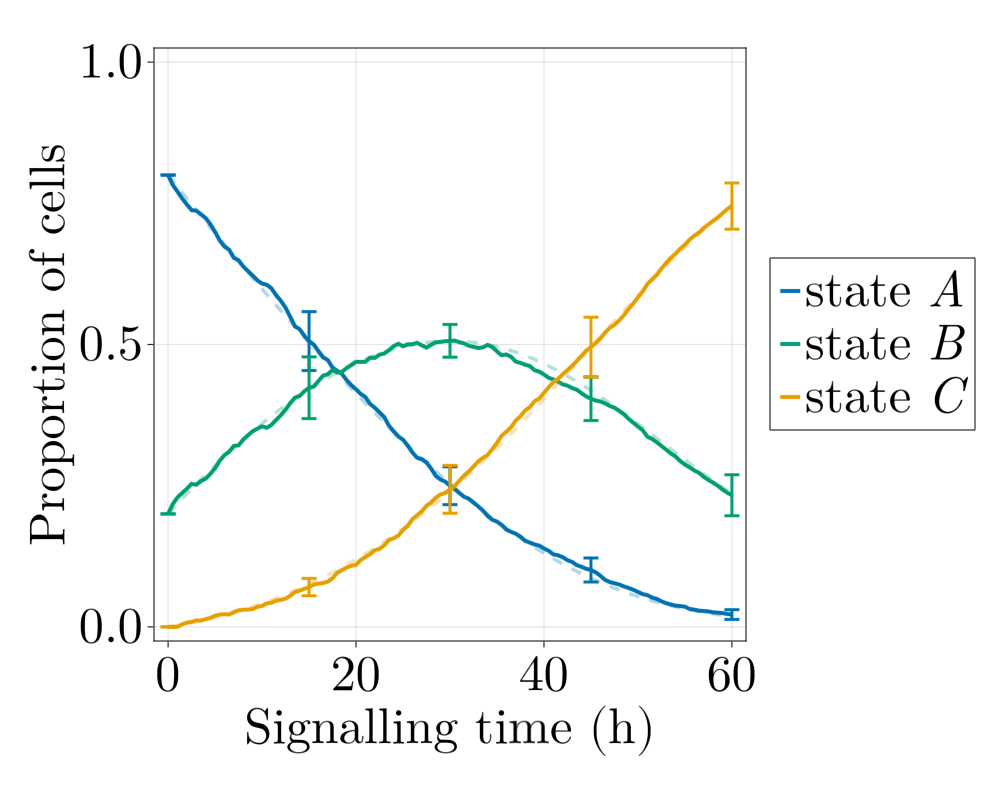

GLMakie.Screen(...)

In [17]:
plot_proportions_vs_meanfield_std(com, color_map, m1, m2, 
    avgprop_meanfield, std=stdprop_meanfield, k=parameters[:k])

## Nonlinear differentiation kinetics: cell-cell signalling (protrusions off)

In [ ]:
com_aux = deepcopy(growncom);

In [ ]:
setfield!(com_aux,:dt, 0.001);

In [ ]:
com_aux.tau_div = 10;
com_aux.k = parameters[:k];
com_aux.range = parameters[:range]
prot = false;

### Loop

In [ ]:
Random.seed!(1234)
ite = 10
seeds = rand(1:2000, ite)
props_cellcell = Dict();

In [ ]:
bad = 0
for i in 1:ite
	seed = seeds[i]
	print("Seed $i/$ite = $seed ...")
	Random.seed!(seed)

	com = deepcopy(com_aux)
	initialize_diff!(com, g_on = true)
    global m1 = length(com)
    
	differentiate_growing!(com, save_each, tf; prot=prot)
    println(formed_correctly(com))
	global m2 = length(com)

    if !formed_correctly(com)
    	plot_aggregate(com, color_map, m1, m2)
        bad += 1
        continue
    end 
    
	# plot_aggregate(com, color_map, m1, m2)
	props_cellcell[i-bad] = get_props(com)
end
ite -= bad

### Plot comparison

In [ ]:
dimensionalize_com!(com);

In [ ]:
avgprop_cellcell = avg_props_new(com, props_cellcell, ite);
stdprop_cellcell = std_props(com, props_cellcell, ite);

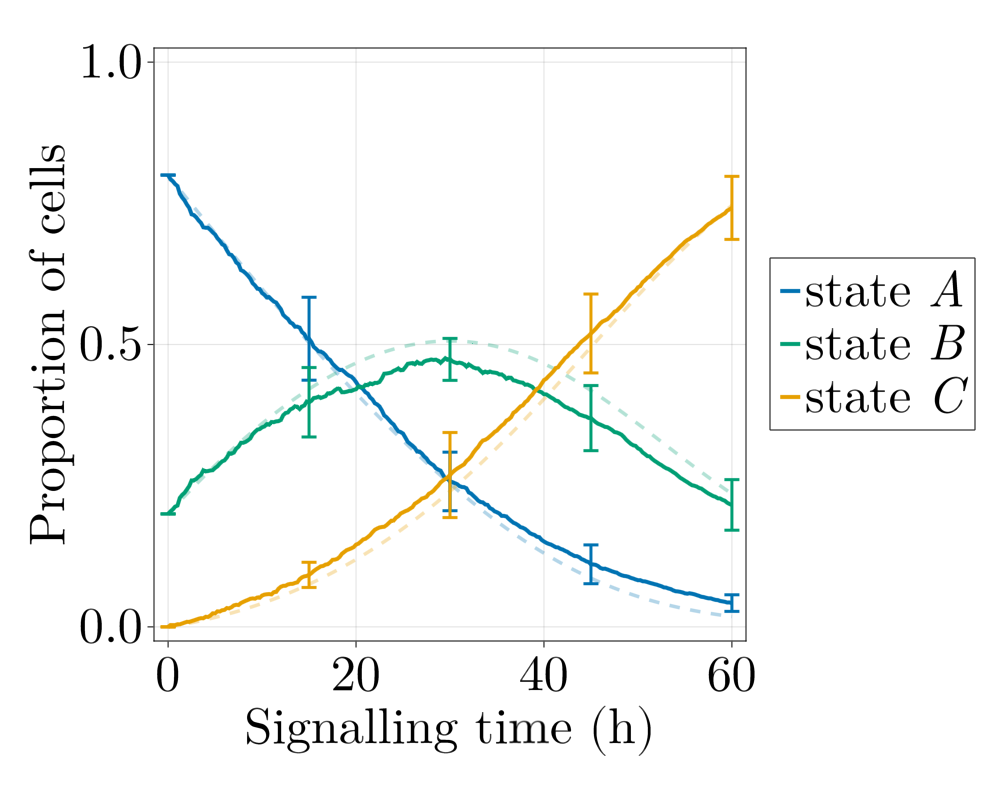

GLMakie.Screen(...)

In [25]:
plot_proportions_vs_meanfield_std(com, color_map, m1, m2, 
    avgprop_cellcell, std=stdprop_cellcell, k=parameters[:k])

## Nonlinear differentiation kinetics: cell-cell signalling (fp = 10)

In [ ]:
com_aux = deepcopy(growncom);

In [ ]:
setfield!(com_aux,:dt, 0.00075);

In [ ]:
com_aux.tau_div = 10;
com_aux.k = parameters[:k];
com_aux.range = parameters[:range];
prot = true;

### Loop

In [ ]:
Random.seed!(1234)
ite = 10
seeds = rand(1:2000, ite)
props_cellcell_fp10 = Dict();

In [ ]:
bad = 0
for i in 1:ite
	seed = seeds[i]
	print("Seed $i/$ite = $seed ...")
	Random.seed!(seed)

	com = deepcopy(com_aux)
	initialize_diff!(com, g_on = true)
    global m1 = length(com)
    
	differentiate_growing!(com, save_each, tf; prot=prot)
    println(formed_correctly(com))
	global m2 = length(com)

    if !formed_correctly(com)
    	plot_aggregate(com, color_map, m1, m2)
        bad += 1
        continue
    end 
    
	# plot_aggregate(com, color_map, m1, m2)
	props_cellcell_fp10[i-bad] = get_props(com)
end
ite -= bad

### Plot comparison

In [ ]:
dimensionalize_com!(com)

In [ ]:
avgprop_cellcell_fp10 = avg_props_new(com, props_cellcell_fp10, ite);
stdprop_cellcell_fp10 = std_props(com, props_cellcell_fp10, ite);

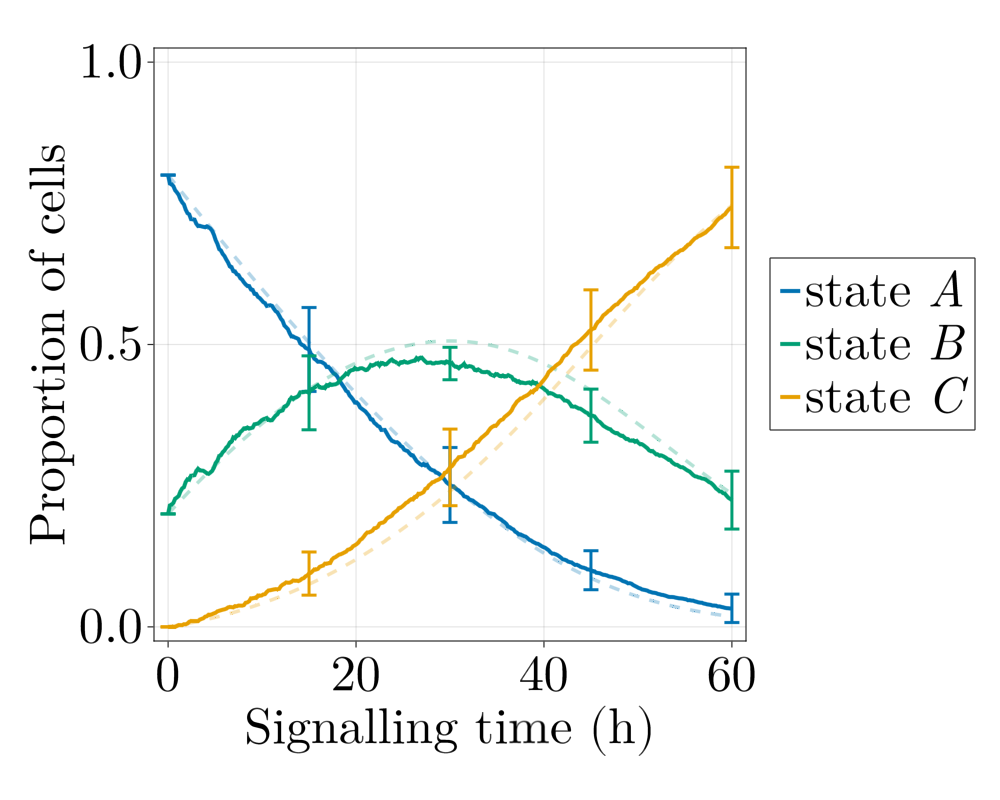

GLMakie.Screen(...)

In [41]:
plot_proportions_vs_meanfield_std(com, color_map, m1, m2, 
    avgprop_cellcell_fp10, std=stdprop_cellcell_fp10, k=parameters[:k])

In [42]:
# plot_proportions_analytical(com, color_map, m1, m2)
# plot_proportions_numerical_meanfield(com, color_map, m1, m2)
# analytical_vs_meanfield(com, color_map, dimensionalize(com,t=tf))

## Nonlinear differentiation kinetics: cell-cell signalling (fp = 50)

In [ ]:
com_aux = deepcopy(growncom);

In [ ]:
setfield!(com_aux,:dt, 0.0001);

In [ ]:
com_aux.tau_div = 10;
com_aux.k = parameters[:k];
com_aux.range = parameters[:range];
prot = true;

### Loop

In [ ]:
Random.seed!(1234)
ite = 10
seeds = rand(1:2000, ite)
props_cellcell_fp50 = Dict();

In [ ]:
bad = 0
for i in 1:ite
	seed = seeds[i]
	print("Seed $i/$ite = $seed ...")
	Random.seed!(seed)

	com = deepcopy(com_aux)
	initialize_diff!(com, g_on = true)
    global m1 = length(com)
    
	differentiate_growing!(com, save_each, tf; prot=prot, fp=50, kp_on=2, kp_off=0.5)
    println(formed_correctly(com))
	global m2 = length(com)

    if !formed_correctly(com)
    	plot_aggregate(com, color_map, m1, m2)
        bad += 1
        continue
    end 
    
	# plot_aggregate(com, color_map, m1, m2)
	props_cellcell_fp50[i-bad] = get_props(com)
end
ite -= bad

### Plot comparison

In [ ]:
dimensionalize_com!(com)

In [ ]:
avgprop_cellcell_fp50 = avg_props_new(com, props_cellcell_fp50, ite);
stdprop_cellcell_fp50 = std_props(com, props_cellcell_fp50, ite);

In [ ]:
plot_proportions_vs_meanfield_std(com, color_map, m1, m2, 
    avgprop_cellcell_fp50, std=stdprop_cellcell_fp50, k=parameters[:k])